# Tool for Plotting Detected GW Events Over Time

In [1]:
!pip install ligo-gracedb
!pip install gwosc

In [2]:
import numpy as np
import matplotlib

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['savefig.dpi'] = 300
matplotlib.rcParams['legend.fontsize'] = 14

!matplotlib inline
from matplotlib import pyplot as plt
from ligo.gracedb.rest import GraceDb
from gwosc import datasets
import requests
from gwosc.locate import get_urls
from astropy.time import Time
import datetime
client = GraceDb()

Traceback (most recent call last):
  File "/Users/zoheyrdoctor/opt/anaconda3/bin/matplotlib", line 11, in <module>
    sys.exit(plotting._matplotlib())
AttributeError: module 'pandas.plotting' has no attribute '_matplotlib'


In [3]:
event2date = {}

# get info up to O4
for cat in ['GWTC-1-confident','GWTC-2.1-confident','GWTC-3-confident']:
    
    # pull the catalog from gwosc
    r = requests.get(
      f"https://gwosc.org/eventapi/json/{cat}"
      )
    event_json = r.json()

    # extract the names and GPS times 
    for ev in event_json['events'].values():
        event2date[ev['commonName']] = ev['GPS']

# get O4 events
O4_start = 1368921618.0 # gps time
# get superevent times in O4
superevent_iterator_O4 = client.superevents(f'far<7.71604938271605e-08 gpstime: {O4_start} .. 9999999999.9 EM_READY & ADVOK')

for sev in superevent_iterator_O4:
    event2date[sev['superevent_id']] = sev['t_end'] 

In [4]:
O1_start_GPS, O1_end_GPS = 1126051217.00, 1137254417.00
O2_start_GPS, O2_end_GPS = 1164556817.00, 1187733618.00
O3a_start_GPS, O3a_end_GPS = 1238166018.00, 1253977218.00
O3b_start_GPS, O3b_end_GPS = 1256655618.00, 1269363618.00
O3_start_GPS, O3_end_GPS = 1238166018.00,1269363618.00

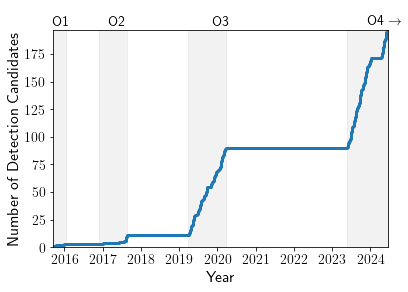

In [5]:
def get_date(date_str):
    return datetime.datetime(*[int(val) for val in date_str.split(' ')[0].split('-')])

def gps_time_to_utc_datetime(gps_floats):
    return Time(Time(list(gps_floats),format='gps'),format='iso',scale='utc').value

plt.step(sorted(
            list(map(
                    get_date,
                    gps_time_to_utc_datetime(event2date.values())
                )
            )
        ),
        range(len(event2date)),
        lw=3,
)


plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylim([0,len(event2date)])
plt.xlim([datetime.datetime(2015, 9, 14, 0, 0),datetime.date.today()])

plt.fill_between(gps_time_to_utc_datetime([O1_start_GPS, O1_end_GPS]),len(event2date),color='gray',alpha=0.1)
plt.fill_between(gps_time_to_utc_datetime([O2_start_GPS, O2_end_GPS]),len(event2date),color='gray',alpha=0.1)
plt.fill_between(gps_time_to_utc_datetime([O3_start_GPS, O3_end_GPS]),len(event2date),color='gray',alpha=0.1)
plt.fill_between([get_date(gps_time_to_utc_datetime([O4_start])[0]),datetime.date.today()],len(event2date),color='gray',alpha=0.1)


plt.annotate('O1', (0.12, 0.96), xycoords='figure fraction', va="top",fontsize=14)
plt.annotate('O2', (0.25, 0.96), xycoords='figure fraction', va="top",fontsize=14)
plt.annotate('O3', (0.49, 0.96), xycoords='figure fraction', va="top",fontsize=14)
plt.annotate('O4 $\\rightarrow$', (0.85, 0.96), xycoords='figure fraction', va="top",fontsize=14)


    
plt.xlabel('Year',fontsize=16)
plt.ylabel('Number of Detection Candidates',fontsize=16)
plt.savefig('NcandVsYear.png',dpi=300)